<a href="https://www.kaggle.com/code/olkorol/life-expectancy-who?scriptVersionId=204257154" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-expectancy-who/Life Expectancy Data.csv


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer, StandardScaler

In [3]:
# load the dataset (df stands for the DataFrame)
df = pd.read_csv("/kaggle/input/life-expectancy-who/Life Expectancy Data.csv")

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Let's check if there are any missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [6]:
# Eliminate the extra spaces
df.columns = df.columns.str.strip()  

In [7]:
# Calculate total number of nulls for each column:

# 1. isnull() returns a mask, where null values is replaced with True 
isnull = df.isnull()
# 2. Count null records for each columns
# (true boolean values are interpretted as 1)
isnull = isnull.sum()
# 3. print columns with 1 or more null value
isnull[isnull>0]

Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
BMI                                 34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
df.dropna(axis='index', how='any', inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio                    

In [10]:
# dtypes stands for Data Types
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [11]:
# Сast Country and Status to categorical
for x in 'Status', 'Country':
  print(f"{x} values: {df[x].unique()}\n")
  df[x] = df[x].astype('category')

Status values: ['Developing' 'Developed']

Country values: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Costa Rica' 'Croatia' 'Cyprus' 'Djibouti' 'Dominican Republic'
 'Ecuador' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Fiji' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'India'
 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kiribati' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives'
 'Mali' 'Malta' 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia' 'Montenegro'
 'Morocco' 'Mozambique

In [12]:
# The new categorical columns include a .cat property with a .categories nested
# property that lists all the available categories for the column:
print("Countries: ", df['Country'].cat.categories)

Countries:  Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       ...
       'Tunisia', 'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Zambia', 'Zimbabwe'],
      dtype='object', length=133)


In [13]:
df['Population'].value_counts()

Population
718239.0      2
1141.0        2
33736494.0    1
5666581.0     1
526796.0      1
             ..
1536411.0     1
1586754.0     1
16421.0       1
169711.0      1
12222251.0    1
Name: count, Length: 1647, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Country                          1649 non-null   category
 1   Year                             1649 non-null   int64   
 2   Status                           1649 non-null   category
 3   Life expectancy                  1649 non-null   float64 
 4   Adult Mortality                  1649 non-null   float64 
 5   infant deaths                    1649 non-null   int64   
 6   Alcohol                          1649 non-null   float64 
 7   percentage expenditure           1649 non-null   float64 
 8   Hepatitis B                      1649 non-null   float64 
 9   Measles                          1649 non-null   int64   
 10  BMI                              1649 non-null   float64 
 11  under-five deaths                1649 non-null   int64   
 12  Polio      

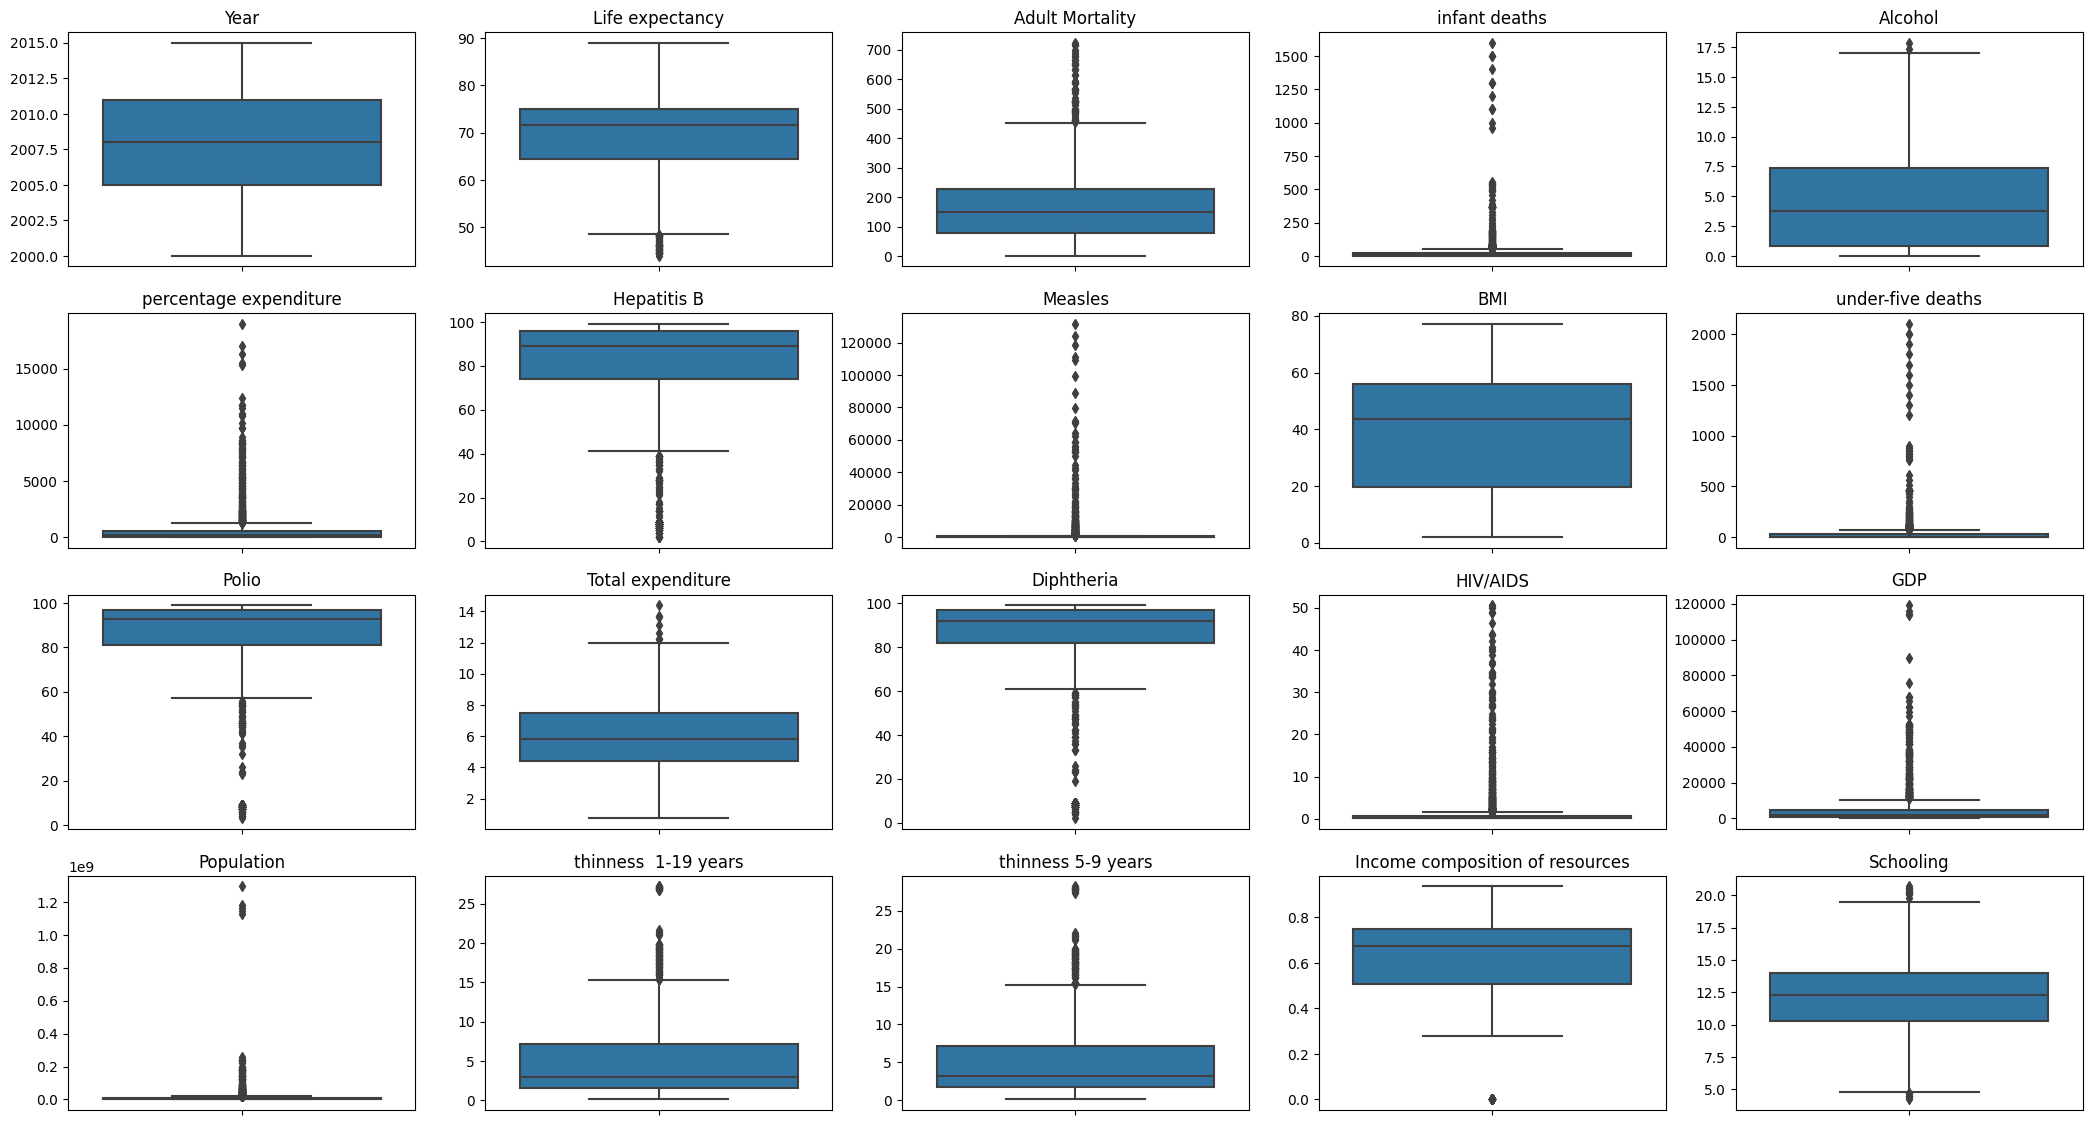

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Get numeric columns only
numeric = list(df.select_dtypes(include=np.number).columns)

# Create figure with 20 subplots
fig, axes = plt.subplots(nrows=4,ncols=5, figsize=(26, 14))
# By default, axes is a 4x5 matrix, ravel it to a flat array with 20 elements
axes = axes.ravel()

# Sanity check
assert len(numeric) == len(axes)

# Plot boxplot for each numeric column
for col, ax in zip(numeric, axes):
  sns.boxplot(y = df[col], ax=ax)
  #sns.violinplot(y = df[col], ax=ax)
  ax.set_title(col)
  ax.set(xlabel='', ylabel='')

In [16]:
# Perform `describe` only for numeric columns
df[numeric].describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


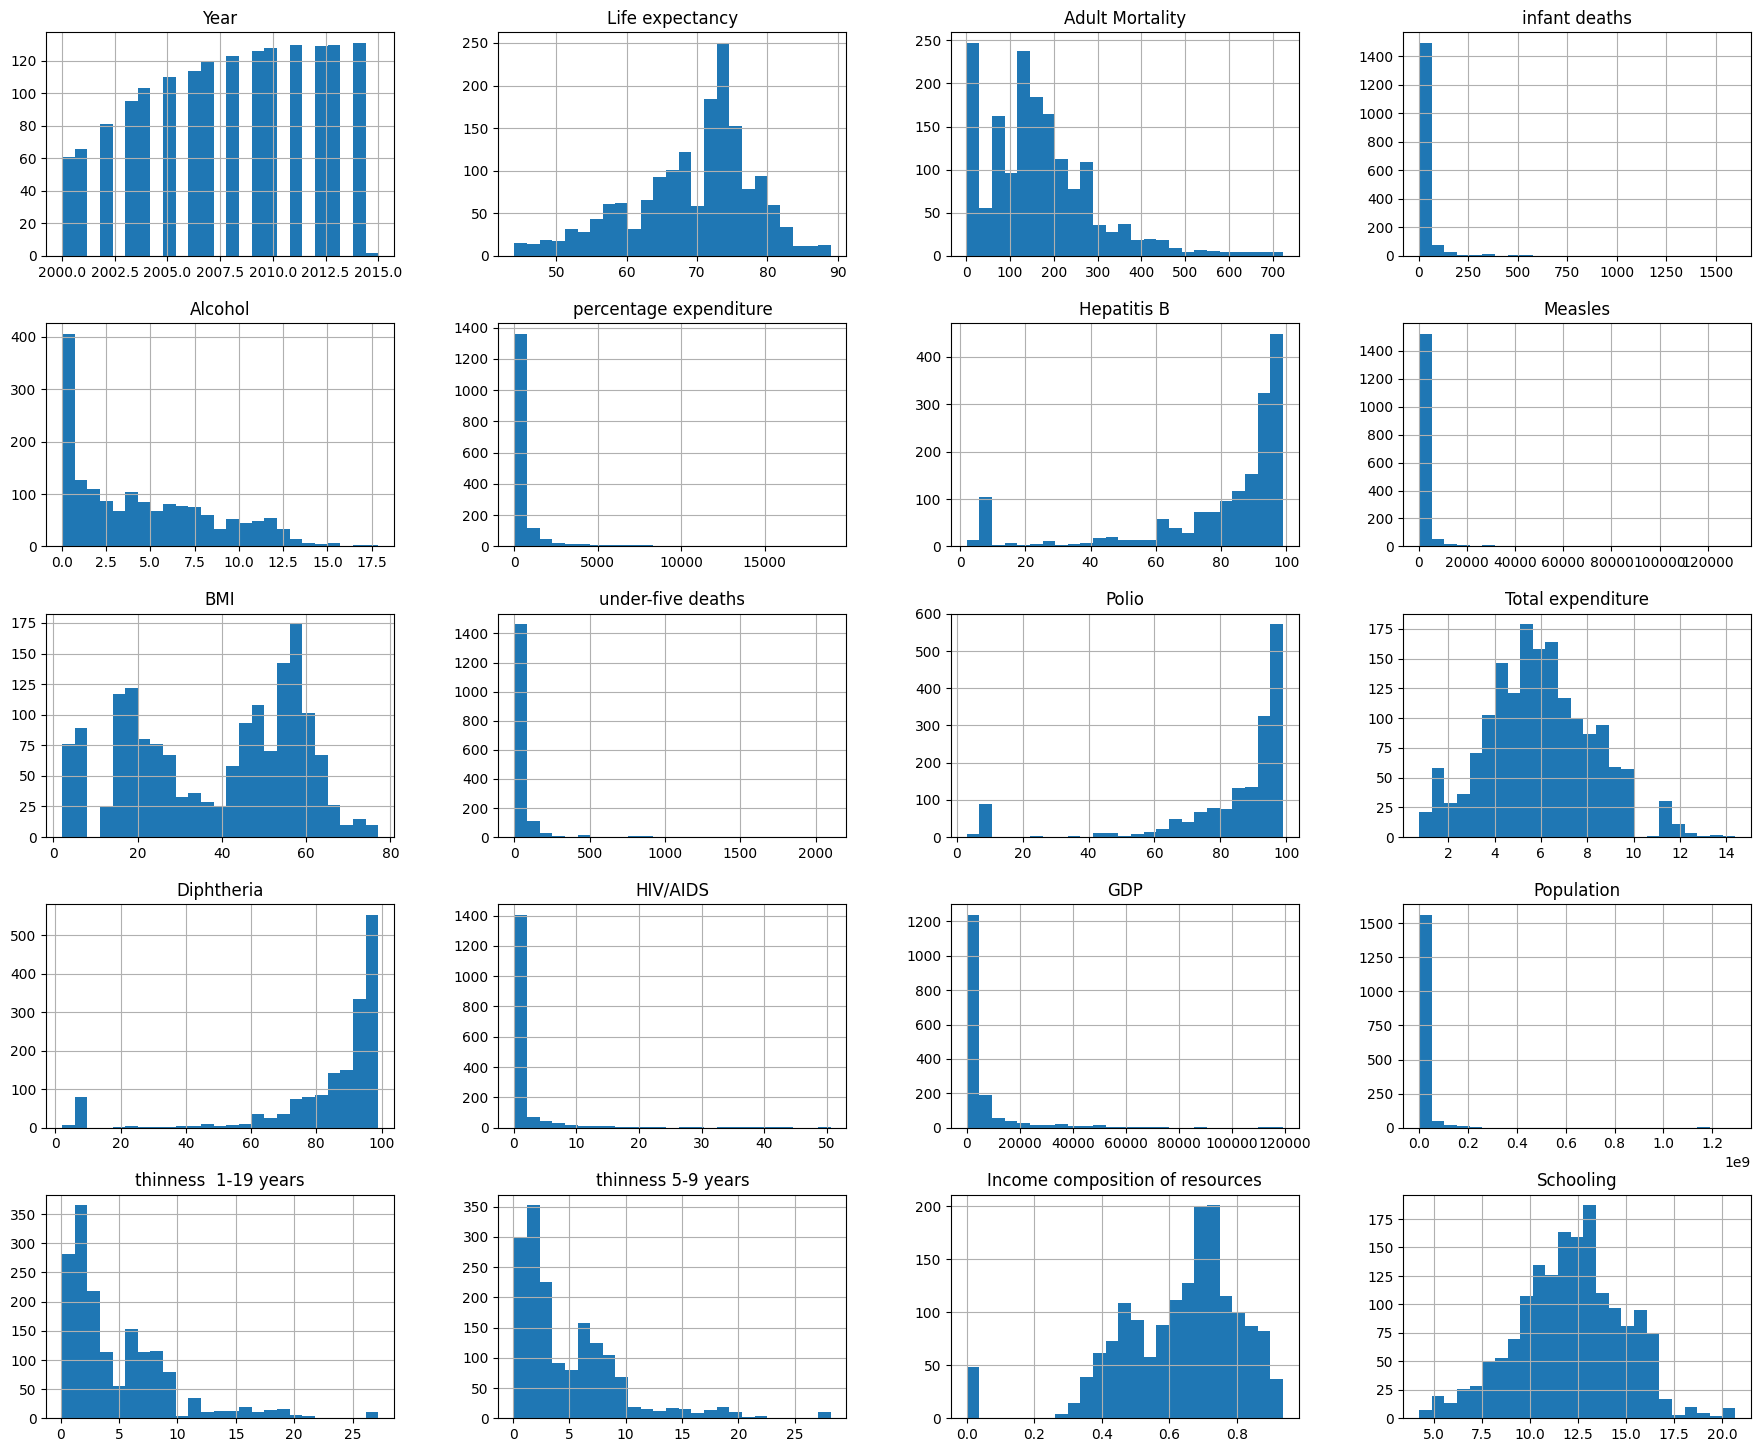

In [17]:
_ = df[numeric].hist(figsize=(22, 18), bins=25)

One way to deal with outliers is to "trim" the data and keep only records where values in each column are within [ α , 1- α ] percentiles.

In [18]:
print(f"Records before: {len(df)}")

# Get 0.01 and 0.99 percentile for each column, alpha = 0.01 ###p - то значение которое не будут превышать с вероятностью 5 проц
low, high = 0.01, 0.99
quantiles = df[numeric].quantile([low, high])

# Remove Year column from the 'trimming' procedure
quantiles.drop(columns=['Year'], inplace=True)

for col in quantiles.columns:
  low, high = quantiles[col].tolist()
  mask = (df[col]>=low) & (df[col]<=high)
  df = df[mask]

print(f"Records after: {len(df)}")

Records before: 1649
Records after: 1355


In [19]:
quantiles

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0.01,46.0,3.48,0.00,0.0100,0.871529,6.0,0.0,2.348,0.0,7.0,1.2000,7.0,0.1,18.764196,3.888400e+02,0.100,0.100,0.00000,5.248
0.99,86.0,614.04,517.16,14.1524,8600.531285,99.0,54807.0,72.752,809.8,99.0,11.6856,99.0,34.6,52021.810764,1.836554e+08,19.852,20.524,0.91152,18.600


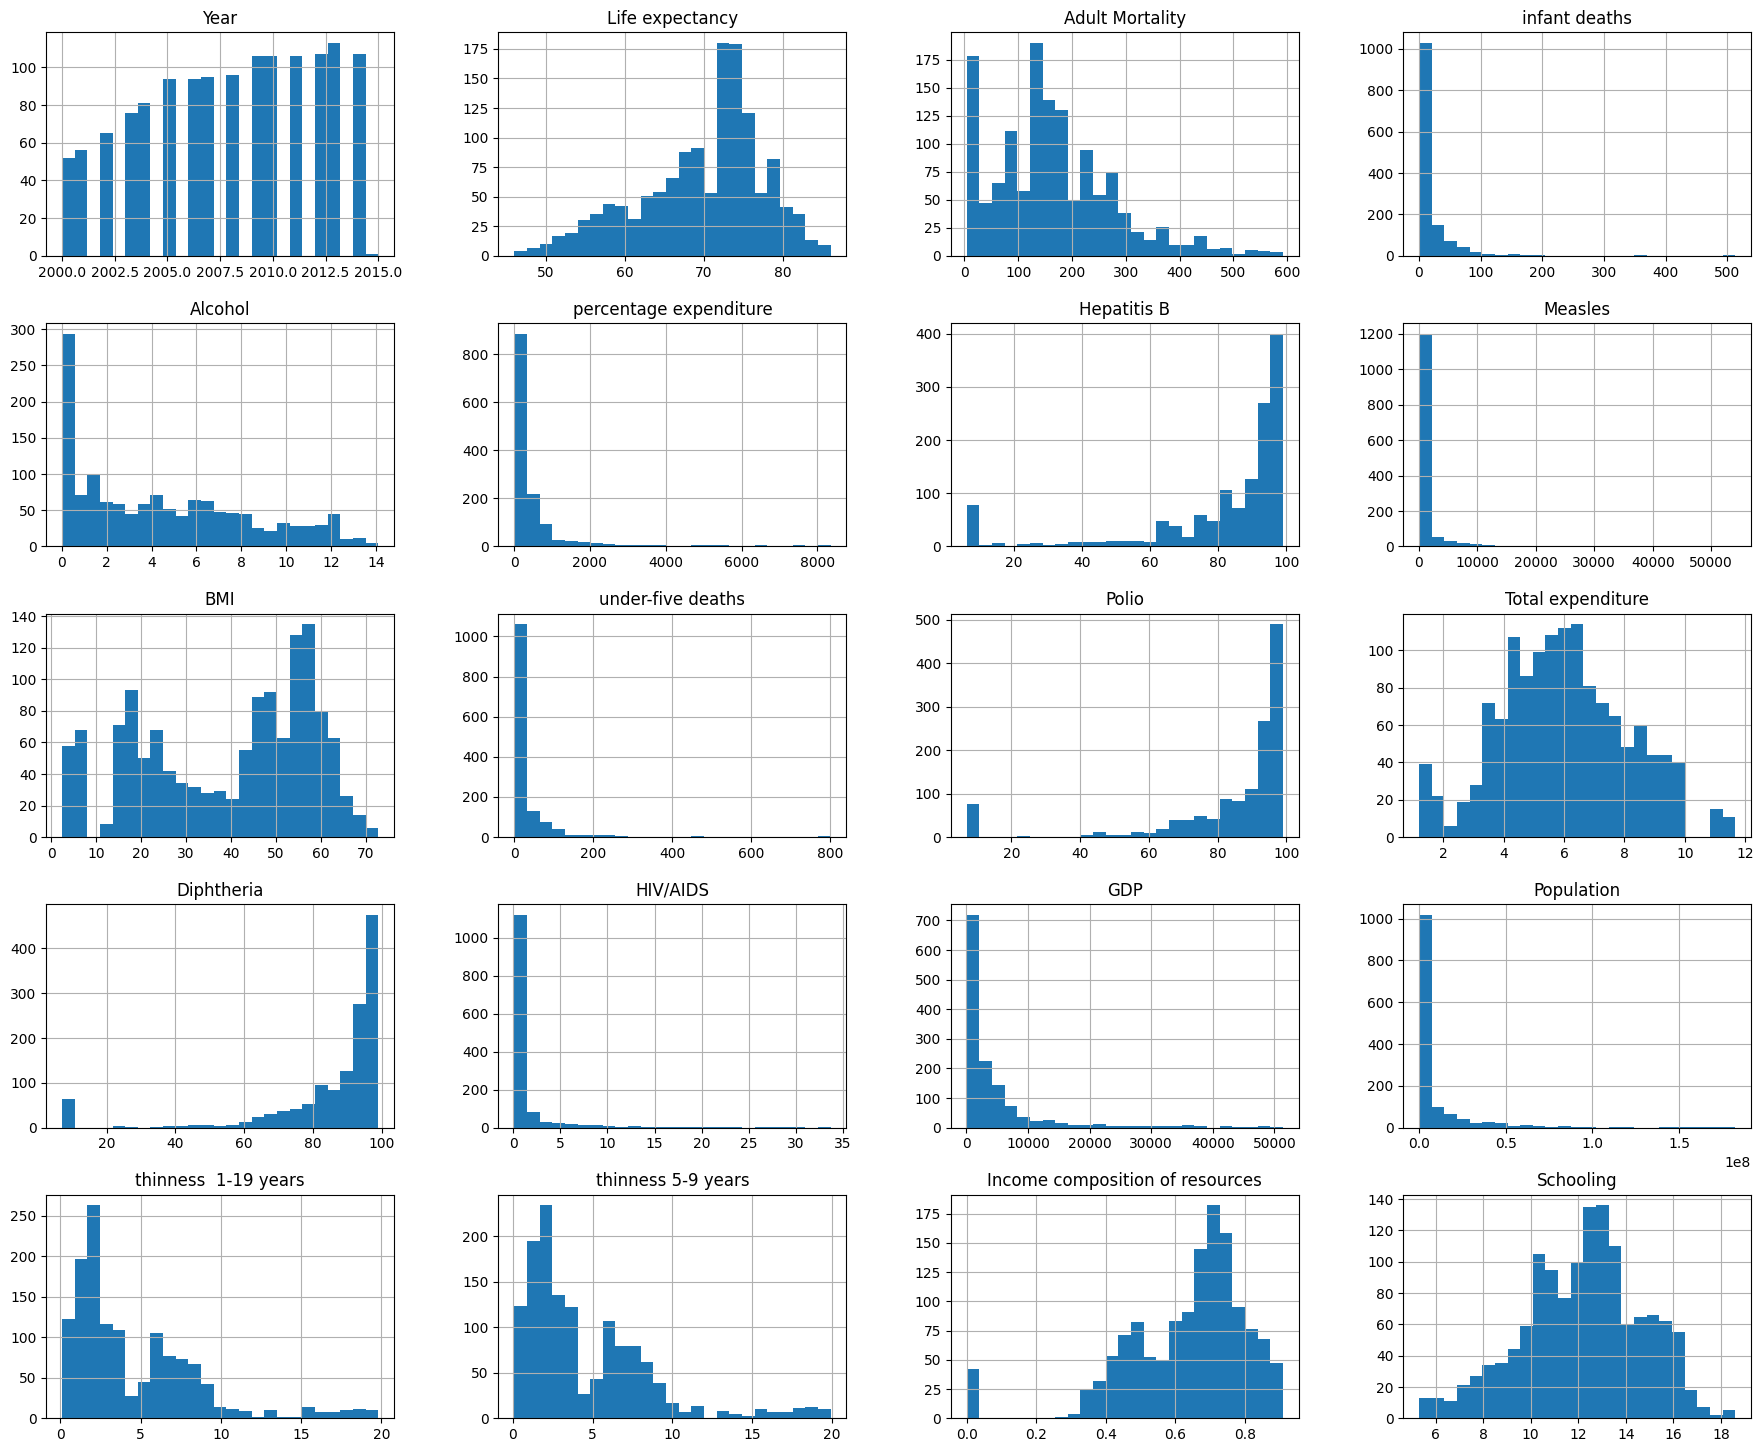

In [20]:
_ = df[numeric].hist(figsize=(22, 18), bins=25)

In [21]:
print(f"Recods before: {len(df)}")
df = df[df['Income composition of resources'] > 1e-6].copy()
print(f"Recods after: {len(df)}")

Recods before: 1355
Recods after: 1313


<Axes: >

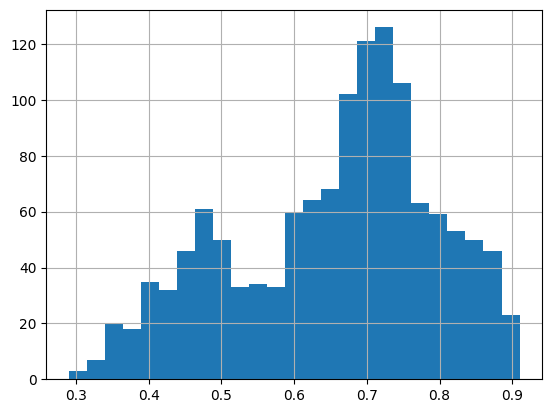

In [22]:
df['Income composition of resources'].hist(bins=25)

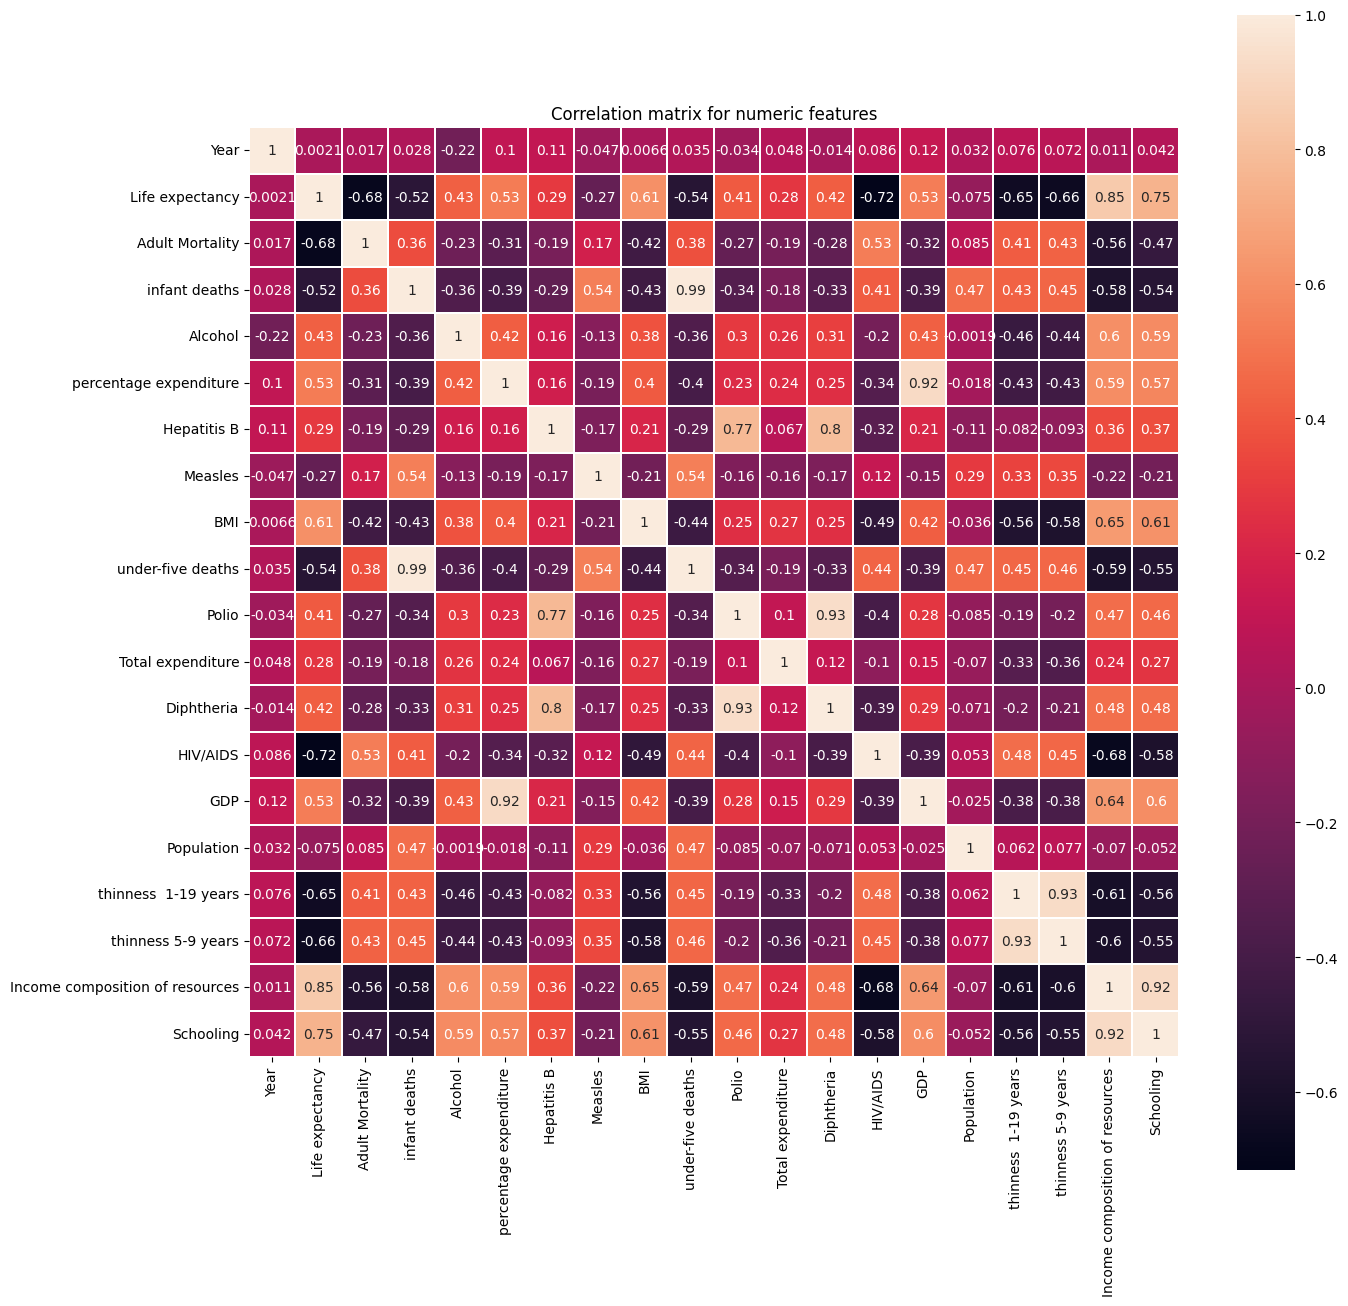

In [23]:
correlations = df[numeric].corr(method='spearman') 

plt.figure(figsize=(15,15))
sns.heatmap(correlations, square=True, annot=True, linewidths=0.25)
plt.title("Correlation matrix for numeric features")
plt.show()

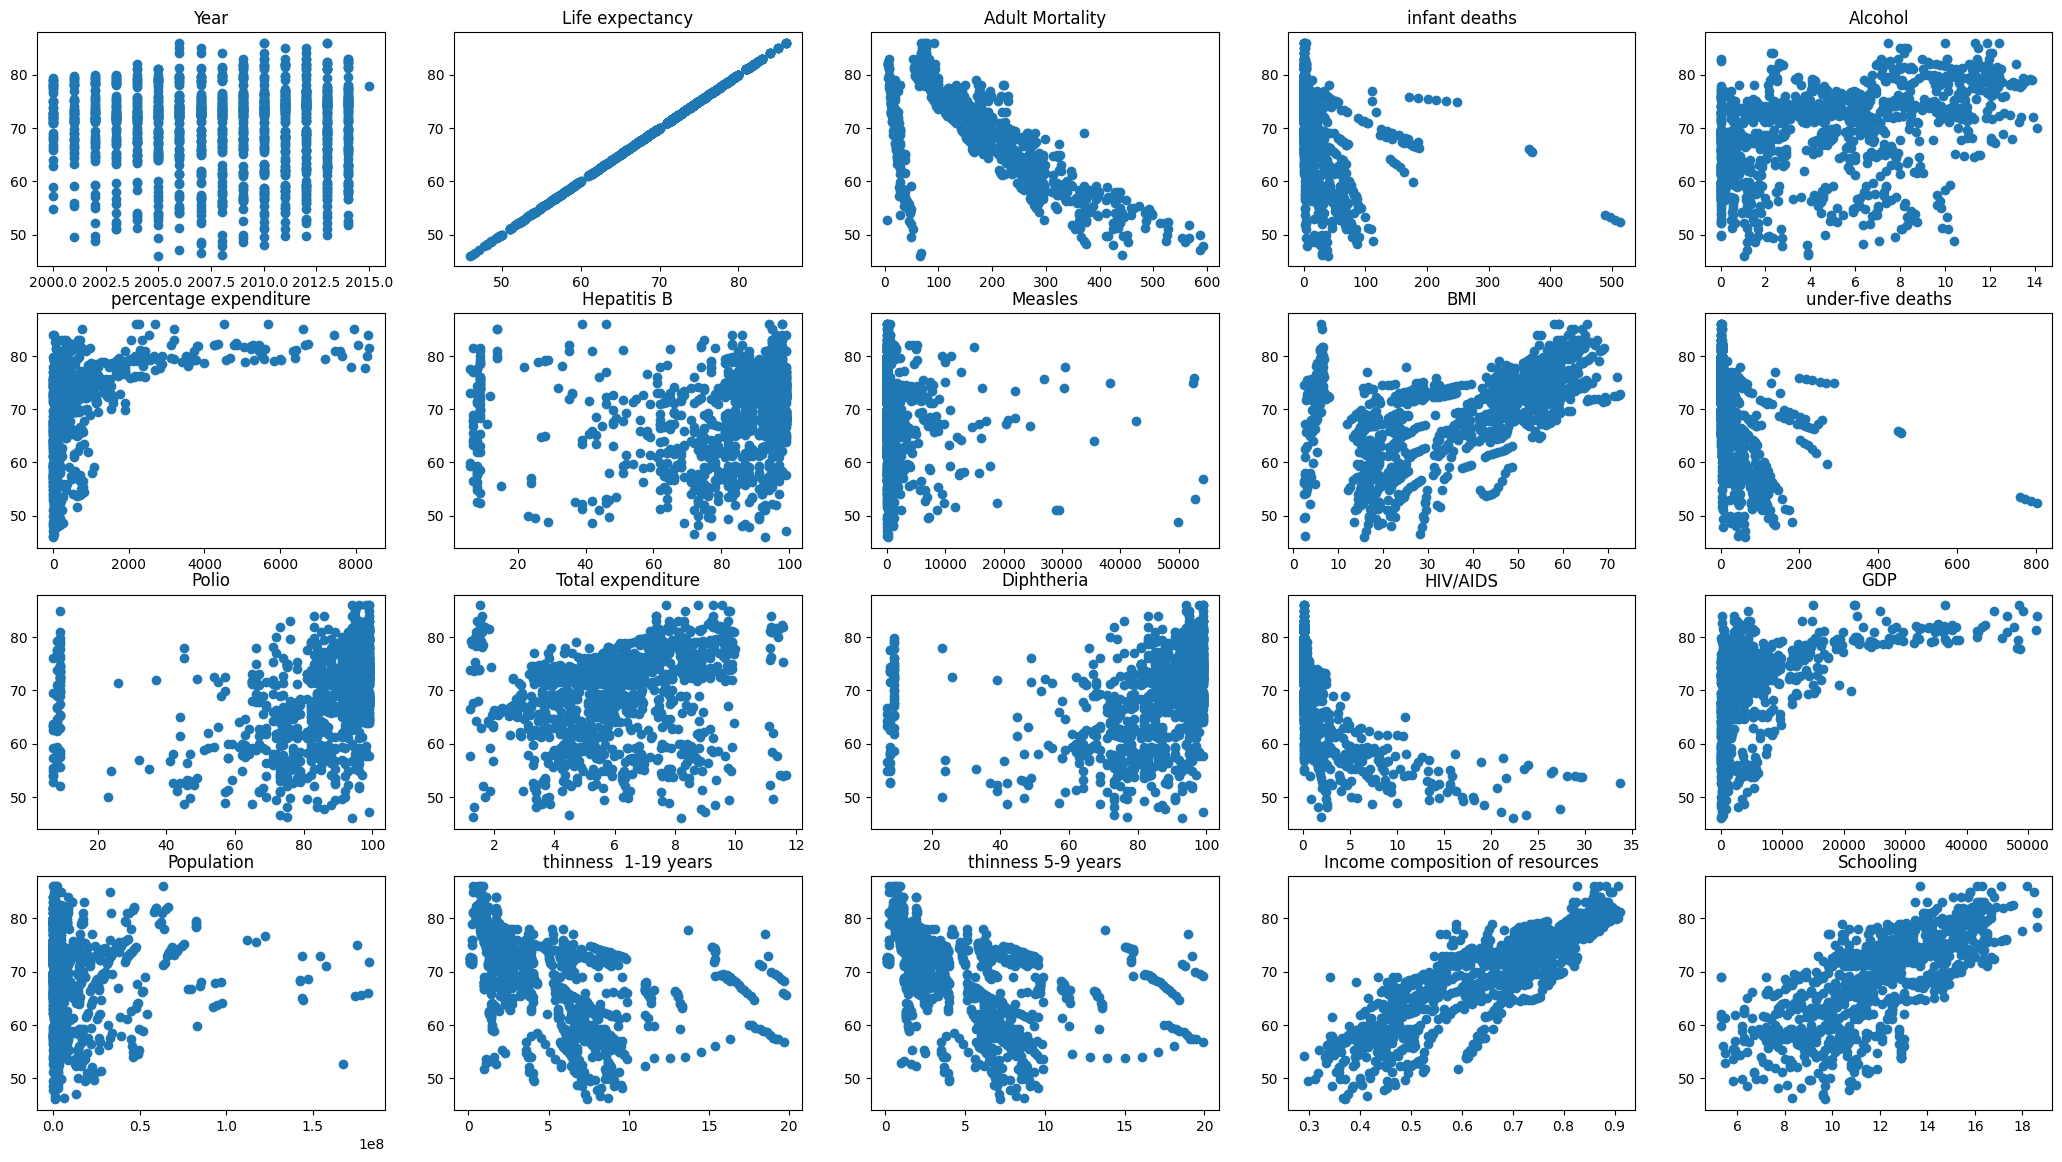

In [24]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(26, 14))
axes = axes.ravel()

for ax, col in zip(axes, numeric):
  ax.scatter(df[col], df['Life expectancy'])
  ax.set_title(col)

Empty columns indicate categories that were present in the original dataset, but disappeared after filtering.

Let's remove these "empty" categories from the general list:

In [25]:
# select only categorical columns
categorical = df.select_dtypes('category').columns.tolist()

for col in categorical:
  df[col].cat.remove_unused_categories()

# ML-preprocessing

## Dummy variables (one-hot encoding)

In [26]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,95.0,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8
2926,Zimbabwe,2011,Developing,54.9,464.0,28,6.00,63.750530,94.0,0,...,93.0,6.31,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1
2927,Zimbabwe,2010,Developing,52.4,527.0,29,5.21,53.308581,9.0,9696,...,89.0,5.37,89.0,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0
2928,Zimbabwe,2009,Developing,50.0,587.0,30,4.64,1.040021,73.0,853,...,69.0,6.26,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9


In [27]:
# Glue list with columns
columns = numeric + categorical
# Drop columns in-place
for x in "Country", "Year":
  columns.remove(x)
# Select only remaining columns from the data frame
df = df[columns]
df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,Developing
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,Developing
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,Developing
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,Developing
5,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,Developing


In [28]:
# Replace column Status with dummy variables
ddf = pd.get_dummies(df, columns=['Status'])
ddf

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,False,True
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,False,True
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,False,True
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,False,True
5,58.8,279.0,74,0.01,79.679367,66.0,1989,16.7,102,66.0,...,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,56.6,429.0,26,6.09,92.602336,97.0,0,3.3,39,95.0,...,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8,False,True
2926,54.9,464.0,28,6.00,63.750530,94.0,0,29.9,42,93.0,...,93.0,13.3,839.927936,14386649.0,6.8,6.7,0.452,10.1,False,True
2927,52.4,527.0,29,5.21,53.308581,9.0,9696,29.4,44,89.0,...,89.0,15.7,713.635620,1486317.0,7.1,7.0,0.436,10.0,False,True
2928,50.0,587.0,30,4.64,1.040021,73.0,853,29.0,45,69.0,...,73.0,18.1,65.824121,1381599.0,7.5,7.4,0.419,9.9,False,True


In [29]:
from sklearn.model_selection import train_test_split

Y = ddf.pop("Life expectancy")
Y = Y.values
X = ddf.values

print("Before:")
print(f"\tX: {X.shape}; Y: {Y.shape}")


X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state = 42
)

print("Train:")
print(f"\tX: {X_train.shape}; Y: {Y_train.shape}")
print("Test:")
print(f"\tX: {X_test.shape}; Y: {Y_test.shape}")


Before:
	X: (1313, 20); Y: (1313,)
Train:
	X: (919, 20); Y: (919,)
Test:
	X: (394, 20); Y: (394,)


In [30]:
from sklearn.preprocessing import PowerTransformer

ptransform = PowerTransformer(standardize=False).fit(X_train)
print("Estimated lambda: ", ptransform.lambdas_)

X_train = ptransform.transform(X_train)
X_test = ptransform.transform(X_test)

Estimated lambda:  [ 5.14010628e-01 -2.00971778e-01  2.29250539e-01  6.22836181e-03
  2.78699748e+00 -1.17206029e-01  1.02433921e+00 -1.87669795e-01
  3.15802234e+00  8.71699411e-01  3.53739263e+00 -2.09508700e+00
  3.87942094e-02  7.85161760e-02 -1.16807530e-01 -7.44955010e-02
  3.38959043e+00  1.53404769e+00 -9.74354789e+00  9.74354769e+00]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

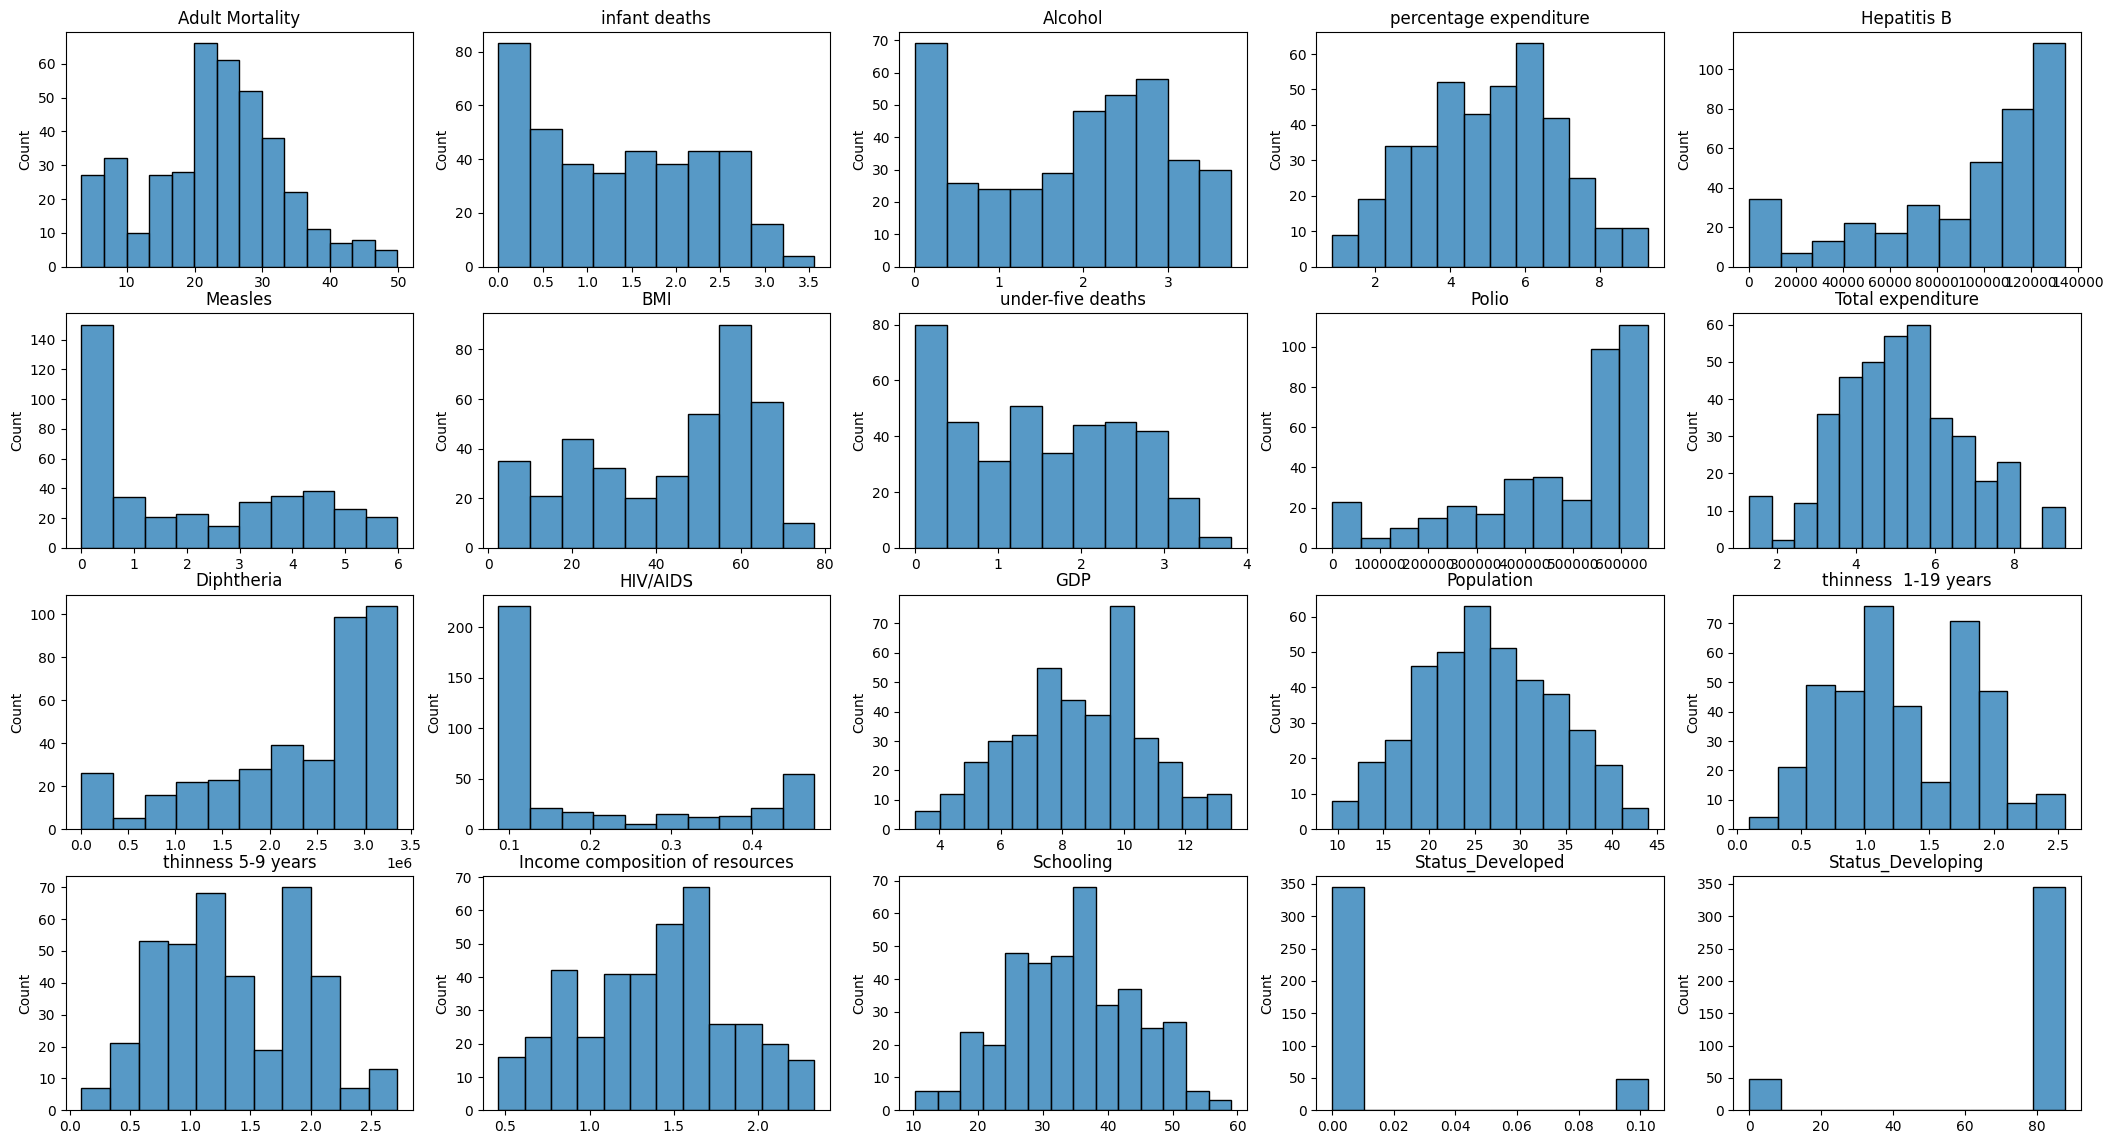

In [31]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(26, 14))
axes = axes.ravel()

X, Y = X_test, X_train
for ax, col in zip(axes, range(X.shape[1])):
  sns.histplot(x=X[:, col], ax=ax)
  ax.set_title(ddf.columns[col])

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
colind = 0
print(f"Train: {X_train[:, colind].mean():.3f}, {X_train[:, colind].std():.3f}")
print(f"Test: {X_test[:, colind].mean():.3f}, {X_test[:, colind].std():.3f}")

Train: -0.000, 1.000
Test: -0.006, 1.009


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

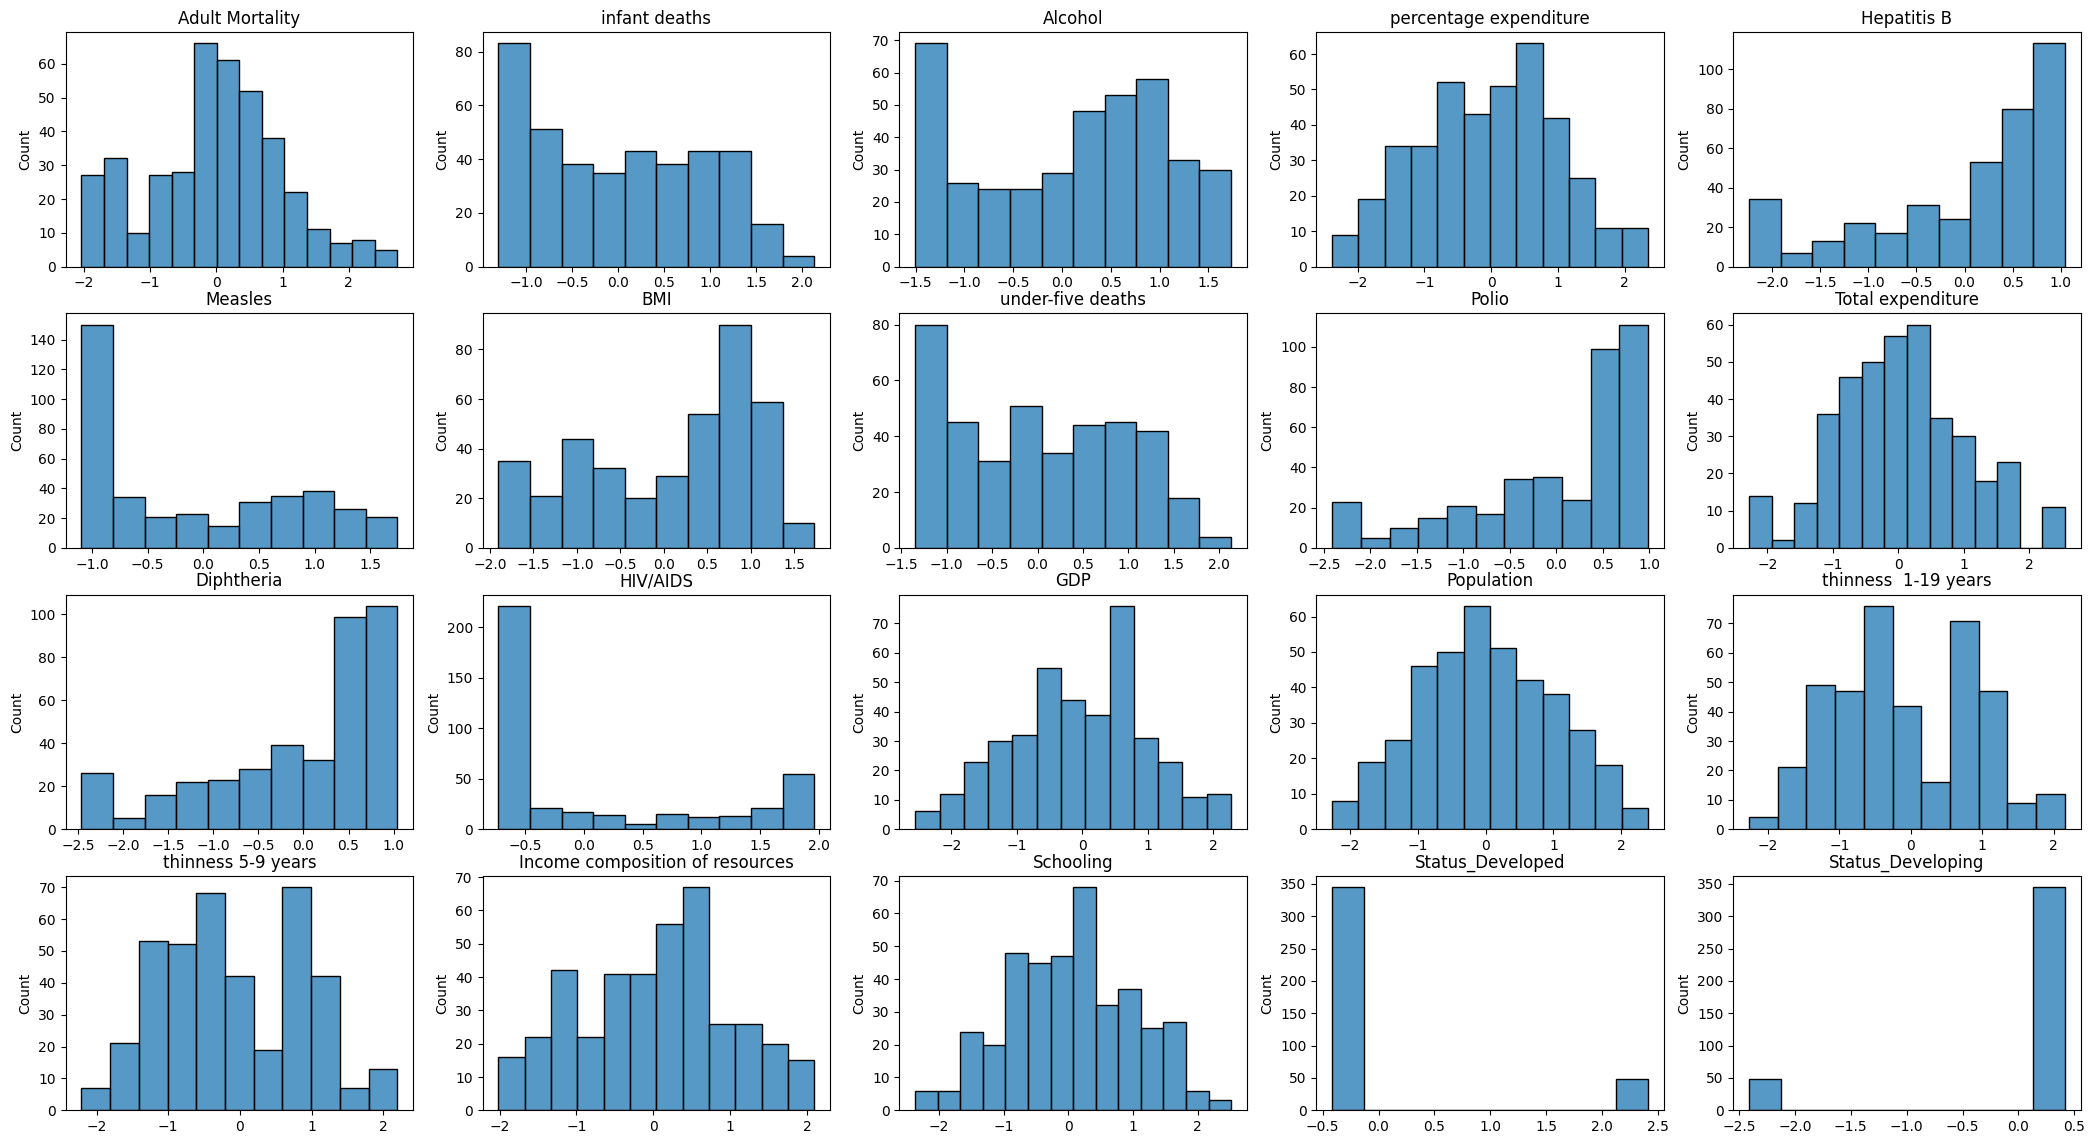

In [34]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(26, 14))
axes = axes.ravel()

X = X_test
for ax, col in zip(axes, range(X.shape[1])):
  sns.histplot(x=X[:, col], ax=ax)
  ax.set_title(ddf.columns[col])

In [35]:
# Create and train a linear regression model
model = LinearRegression().fit(X_train, Y_train)

Y_pred = model.predict(X_test)

# Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r_squared = r2_score(Y_test, Y_pred)

print(f"RMSE: {rmse:.3f}")
print(f"R^2: {r_squared:.3f}")

RMSE: 3.224
R^2: 0.830


In [36]:
# Get the model weights
weights = model.coef_
intercept = model.intercept_

print("Intercept:", intercept)
print("Weights:", weights)

Intercept: 69.77149075081607
Weights: [-1.18424697  0.13070229 -0.51216235  0.92619182 -0.17617478 -0.46020264
  0.14217141 -0.3461826  -0.01772961  0.19291637  0.40883126 -2.13290147
 -0.99450385  0.26925369  0.85517367 -1.40259956  5.98772203 -1.49414973
 -0.17705494  0.17705494]


In [37]:
# Regularisation with Ridge and Lasso
ridge_model = Ridge(alpha=1.0)  
ridge_model.fit(X_train, Y_train)
Y_pred_ridge = ridge_model.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(Y_test, Y_pred_ridge))
r_squared_ridge = r2_score(Y_test, Y_pred_ridge)

print(f"\nRidge Regression:")
print(f"RMSE: {rmse_ridge:.3f}")
print(f"R²: {r_squared_ridge:.3f}")
print("Ridge Weights:", ridge_model.coef_)

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, Y_train)
Y_pred_lasso = lasso_model.predict(X_test)

rmse_lasso = np.sqrt(mean_squared_error(Y_test, Y_pred_lasso))
r_squared_lasso = r2_score(Y_test, Y_pred_lasso)

print(f"\nLasso Regression:")
print(f"RMSE: {rmse_lasso:.3f}")
print(f"R²: {r_squared_lasso:.3f}")
print("Lasso Weights:", lasso_model.coef_)


Ridge Regression:
RMSE: 3.224
R²: 0.830
Ridge Weights: [-1.18913111  0.10612105 -0.50716705  0.90615179 -0.17800479 -0.45772589
  0.14781439 -0.32856052 -0.01337529  0.19065272  0.40921327 -2.14108448
 -0.96493459  0.26915377  0.82707136 -1.38035319  5.9025709  -1.44327721
 -0.17546181  0.17546181]

Lasso Regression:
RMSE: 3.672
R²: 0.779
Lasso Weights: [-0.83294186 -0.          0.          0.          0.         -0.
  0.         -0.          0.          0.          0.         -2.0045237
  0.         -0.         -0.         -0.21928952  3.99128237  0.
  0.         -0.        ]


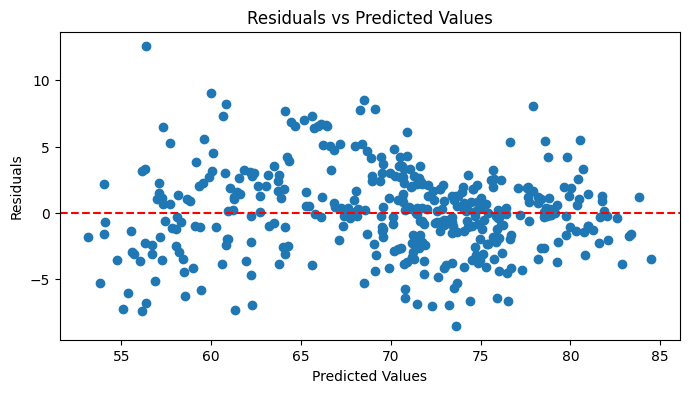

In [38]:
residuals = Y_test - Y_pred

plt.figure(figsize=(8, 4))
plt.scatter(Y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

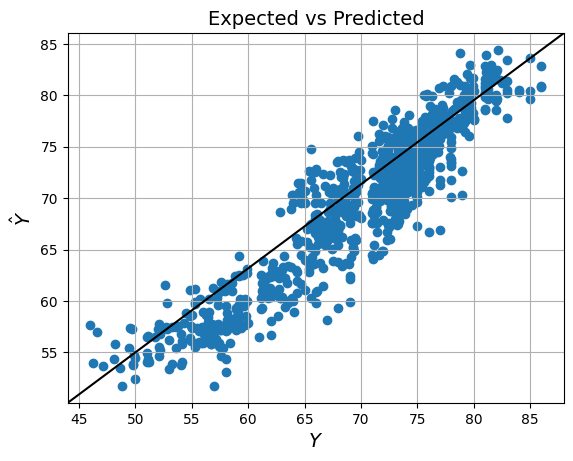

In [39]:
plt.scatter(Y_train, model.predict(X_train)) 
plt.grid() 
plt.xlabel("$Y$", fontweight='bold', fontsize=14)
plt.ylabel("$\hat{Y}$", fontweight='bold', fontsize=14)
plt.title("Expected vs Predicted", fontsize=14)

# Diagonal line
ax = plt.gca()
ax.plot([0, 1], [0, 1], color='black', transform=ax.transAxes)
